In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df_registered = pd.read_csv('registrado.csv')
df_registered.set_index('Registrado (mil ton.)', inplace=True)
df_registered = df_registered.T
df_registered

Registrado (mil ton.),Acre,Alagoas,Amapá,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goiais,Maranhão,...,Piauí,Rio Grande do Sul,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Santa Catarina,São Paulo,Sergipe,Tocantins
2019-01,11.188,32.388,9.691,42.731,291.428,151.601,48.990,111.377,178.918,70.660,...,57.142,226.547,232.609,46.081,32.559,9.908,252.700,860.232,36.567,31.615
2019-02,10.381,30.378,7.378,36.026,249.430,129.537,44.726,98.614,161.936,50.796,...,46.283,228.500,195.364,38.703,24.910,10.723,246.146,773.607,30.849,30.275
2019-03,8.080,30.641,6.970,34.609,241.612,105.236,44.491,94.022,173.792,47.834,...,43.390,223.896,205.690,36.037,28.713,10.625,255.873,790.146,31.021,29.568
2019-04,11.154,32.337,7.612,40.787,252.303,110.835,43.901,91.546,176.627,45.327,...,40.824,234.132,231.354,38.430,32.660,10.593,273.299,886.929,31.437,26.940
2019-05,12.508,36.405,8.442,39.823,281.912,127.925,55.019,95.674,207.991,54.032,...,55.063,207.586,236.711,44.471,31.635,10.681,270.918,941.600,31.533,35.910
2019-06,12.126,22.499,8.835,39.957,200.213,127.138,50.942,88.927,185.784,60.657,...,56.474,228.583,215.360,37.884,35.142,7.887,256.605,817.301,26.431,33.954
2019-07,14.496,27.961,11.251,52.048,270.511,157.128,63.992,105.688,234.176,67.250,...,68.133,234.565,258.015,51.585,36.419,9.751,303.526,957.289,25.978,37.983
2019-08,16.723,32.378,11.342,53.567,281.466,164.440,64.127,104.711,226.996,70.773,...,68.642,249.519,244.870,54.306,40.300,9.654,299.284,978.990,29.860,40.046
2019-09,15.253,32.582,13.110,46.239,285.535,140.298,60.822,97.530,218.141,67.010,...,64.741,230.086,225.410,52.511,35.493,9.422,284.550,906.956,39.045,32.647
2019-10,16.531,42.703,13.195,51.066,328.259,168.407,65.182,99.651,234.939,81.128,...,71.269,233.136,252.849,59.472,38.489,11.160,307.576,980.948,45.213,39.065


In [3]:
df_previsto = pd.read_csv('previsto.csv')
df_previsto.set_index('Previsto (mil ton.)', inplace=True)
df_previsto = df_previsto.T
df_previsto

Previsto (mil ton.),Acre,Alagoas,Amapá,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goiais,Maranhão,...,Piauí,Rio Grande do Sul,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Santa Catarina,São Paulo,Sergipe,Tocantins
2019-01,11.600504,29.717340,11.221207,45.087658,247.232513,153.220657,48.204628,96.325592,173.909943,65.824936,...,61.339470,223.429413,207.831299,48.457928,33.005653,7.445918,253.353317,820.398865,30.656488,30.756824
2019-02,11.751648,30.790043,11.058695,42.223373,240.201019,153.829376,49.959034,96.846024,170.821457,69.412689,...,60.160614,225.057251,205.015594,49.945183,32.539772,7.522638,256.912781,845.005554,31.582760,31.492544
2019-03,12.151968,31.285877,10.996030,46.275936,248.494553,154.371979,50.695339,95.923683,171.106476,71.540741,...,59.585686,230.117020,204.495850,50.881908,31.842428,7.585096,252.835281,833.453491,32.015732,32.956749
2019-04,12.839480,31.341537,10.980310,42.552906,239.684845,155.016617,50.879974,95.599258,174.612274,74.285530,...,60.362049,230.510666,204.843185,50.939217,31.732412,7.637464,253.951004,838.528076,32.134586,34.822922
2019-05,13.646561,31.578241,11.062098,46.378456,249.889847,155.404510,52.087044,96.225479,180.690964,75.787811,...,61.198357,230.596878,205.784088,50.833763,31.495205,7.668759,229.180222,841.658325,32.381744,37.372169
2019-06,13.859261,32.232460,11.118855,43.022514,252.394196,155.548798,53.794441,96.935600,185.375885,77.230865,...,61.313080,230.855881,189.044403,51.323463,31.106770,7.661864,229.509476,842.437561,33.571915,39.588867
2019-07,14.152263,31.394968,11.294769,45.805450,226.865524,155.410965,53.624947,96.118698,188.797394,75.782158,...,58.974072,229.873825,189.989349,50.461178,30.978979,7.647221,224.681152,843.074524,32.205311,39.937222
2019-08,14.439592,32.157215,11.476632,44.377563,248.820847,155.412277,55.604603,93.588684,192.854401,81.154274,...,62.842762,228.411545,189.543610,51.100090,31.674988,7.672256,231.159302,829.204285,33.262463,40.089756
2019-09,14.252661,33.261837,11.527362,47.279137,249.677246,155.525360,58.279102,93.571915,192.794922,82.140671,...,61.570580,232.600189,190.659973,52.186180,30.827982,7.703093,230.947220,829.648865,34.192162,40.500793
2019-10,13.831381,32.925438,11.628198,46.058571,238.576660,155.762726,59.921253,92.796181,195.206177,83.379723,...,61.368660,236.112183,190.934174,52.247200,30.681976,7.749690,227.810349,837.332825,33.426807,40.549477


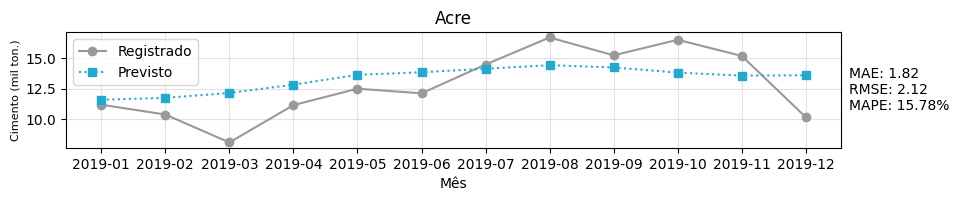

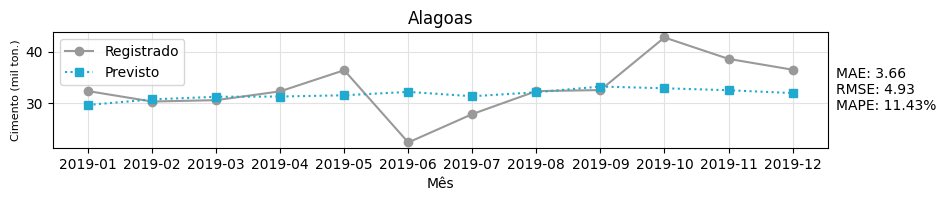

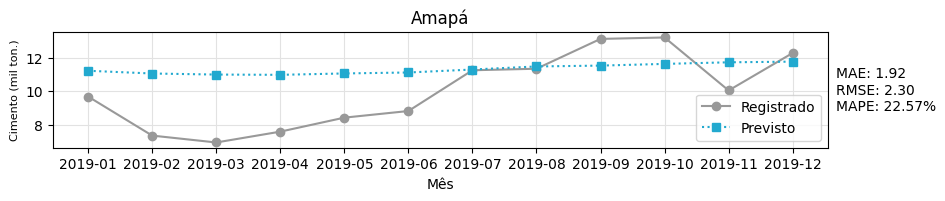

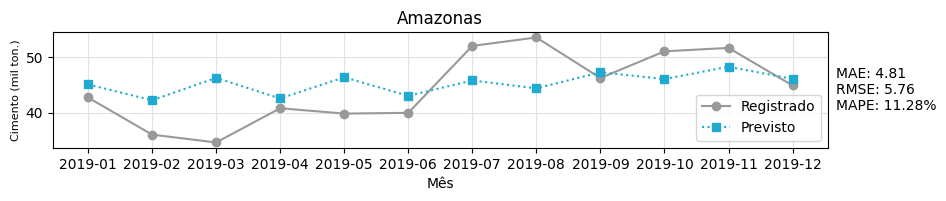

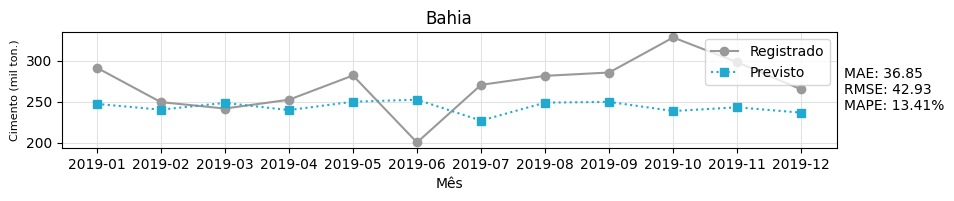

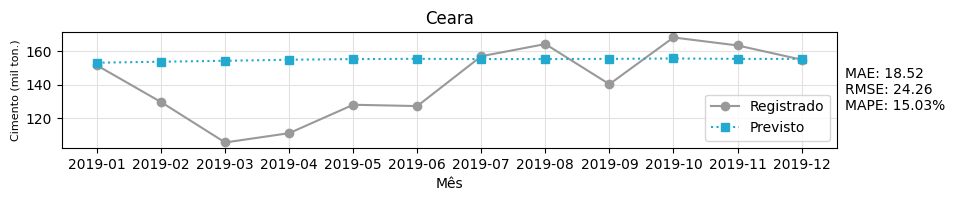

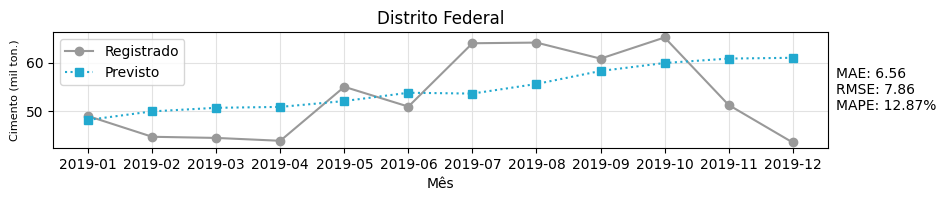

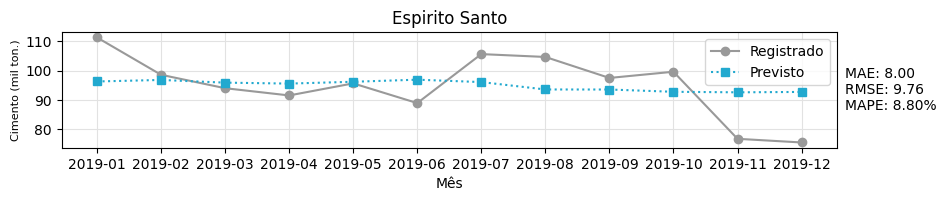

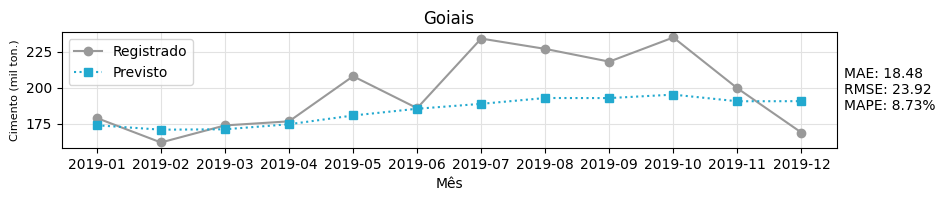

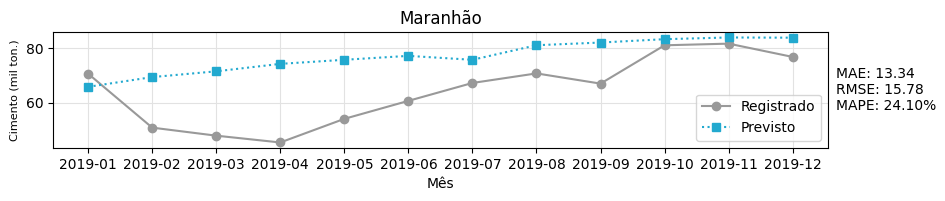

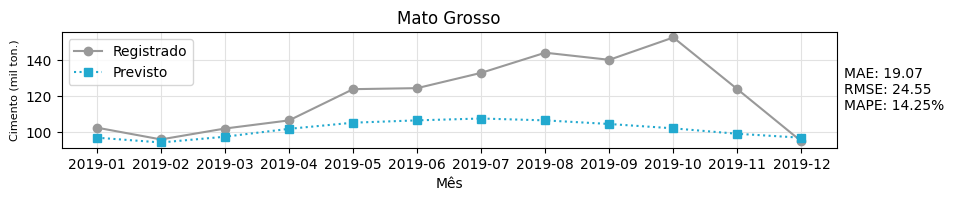

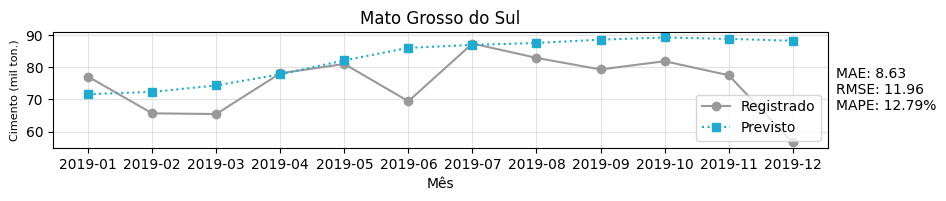

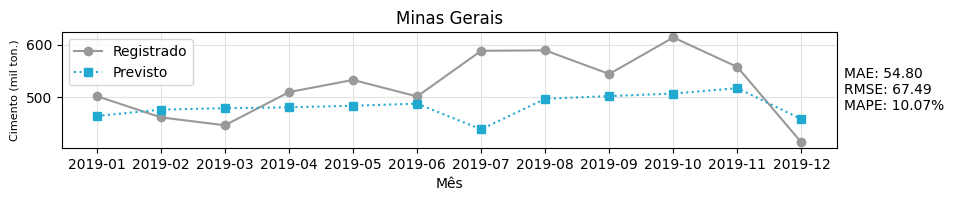

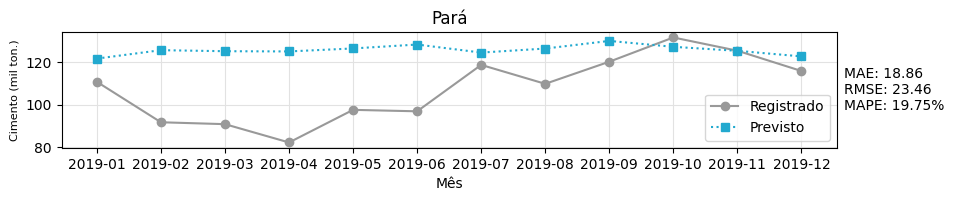

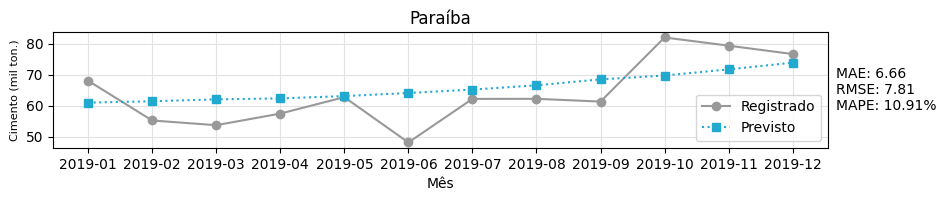

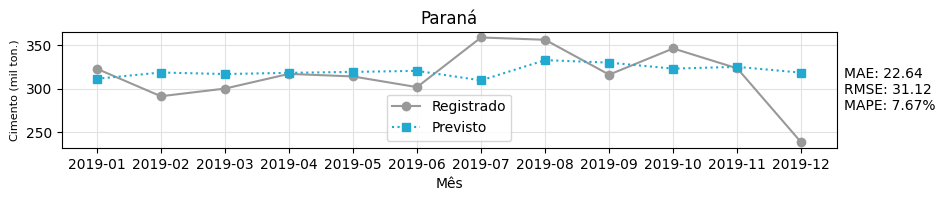

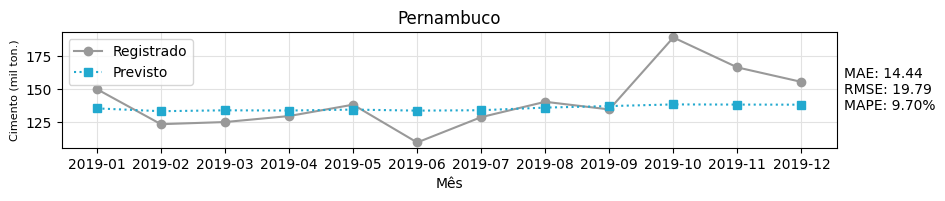

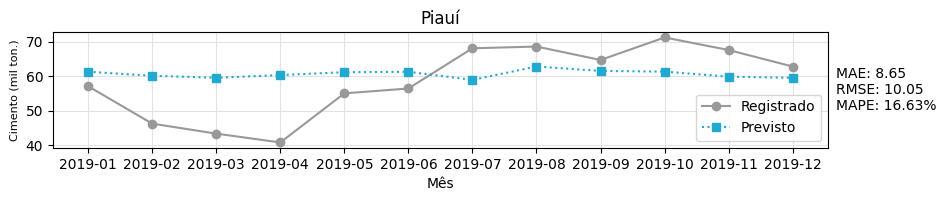

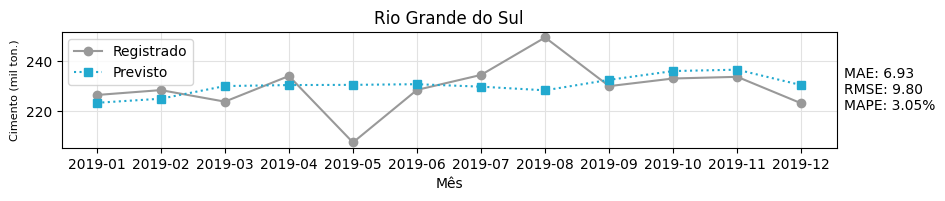

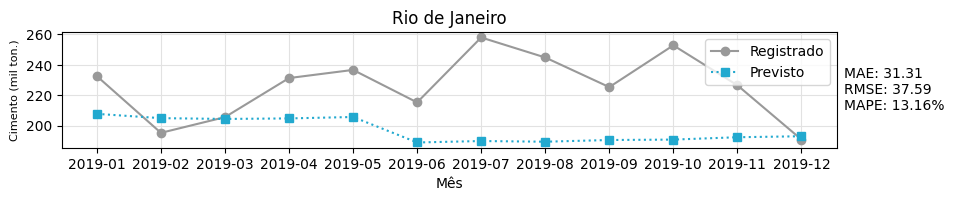

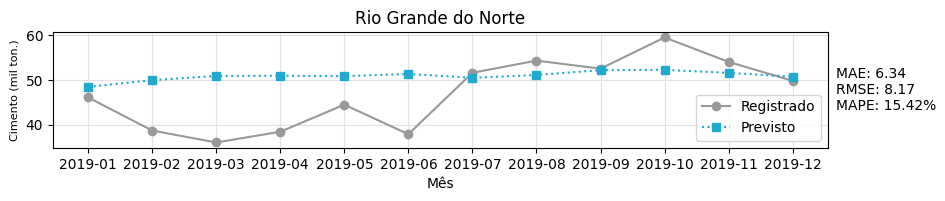

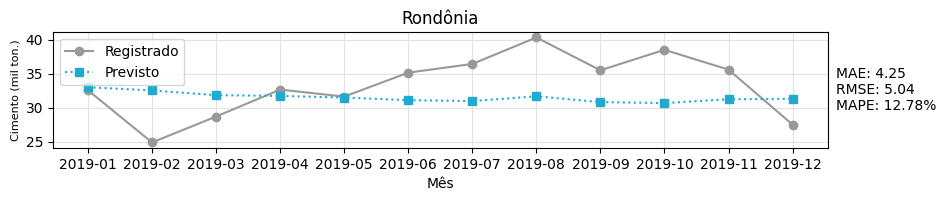

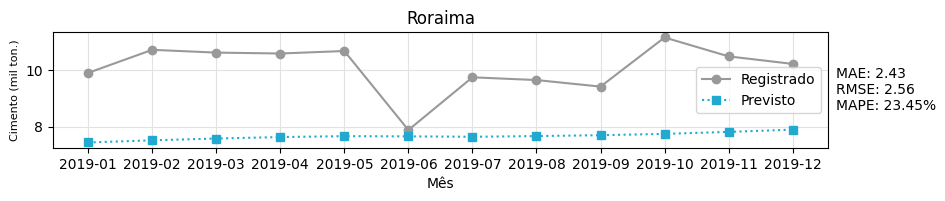

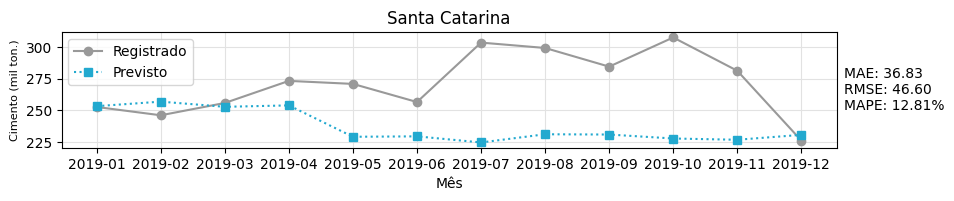

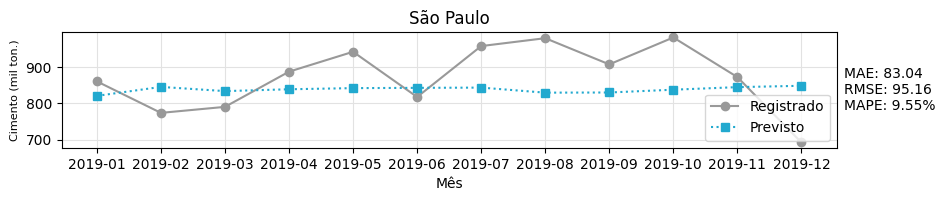

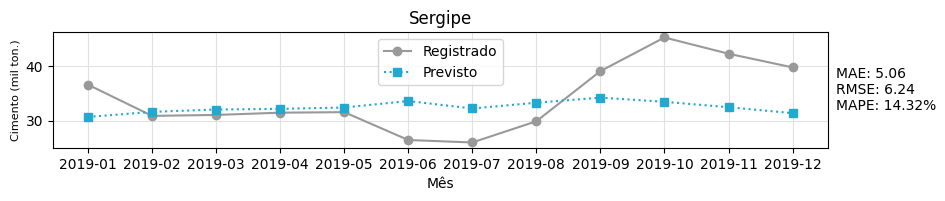

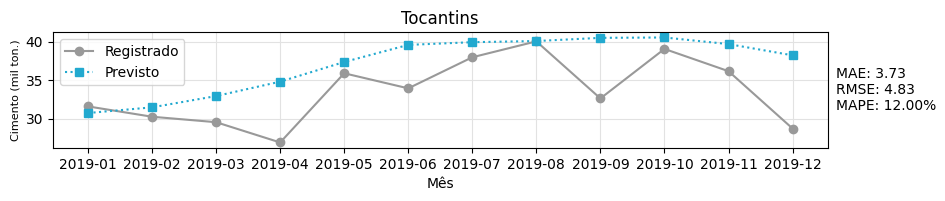

In [4]:
def plot_time_series(df_registered, df_previsto):
    states = df_registered.columns  

    for state in states:
        plt.figure(figsize=(10, 1.5))
        plt.plot(df_registered.index, df_registered[state], 
                 label='Registrado', marker='o', color='#999999') 
        plt.plot(df_previsto.index, df_previsto[state], 
                 label='Previsto', marker='s', linestyle='dotted', color='#22a9cf') 

        actual = df_registered[state]
        predicted = df_previsto[state]

        mae = mean_absolute_error(actual, predicted)
        rmse = mean_squared_error(actual, predicted, squared=False)
        mape = (100 / len(actual)) * sum(abs((actual - predicted) / actual))

        info_text = f'MAE: {mae:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%' 

        plt.text(1.01, 0.5, info_text, transform=plt.gca().transAxes, 
                 fontsize=10, verticalalignment='center')

        plt.xlabel('Mês', fontsize=10)  
        plt.ylabel('Cimento (mil ton.)', fontsize=8) 
        plt.title(f'{state}')
        plt.legend()
        plt.grid(True, color='#E2E2E2') 
        plt.show()


plot_time_series(df_registered, df_previsto)

In [5]:
def plot_error_distribution(df_registered, df_previsto):
    errors = ((df_registered - df_previsto) / df_registered) * 100
    all_errors = errors.values.flatten()
    ranges = [float('-inf'), -50, -30, -10, 10, 30, 50, float('inf')]
    error_counts = pd.cut(all_errors, ranges).value_counts().sort_index()
    labels = ['< -50%', '-50% to -30%', '-30% to -10%', '-10% to 10%', '10% to 30%', '30% to 50%', '> 50%']

    plt.figure(figsize=(8, 6))
    bars = plt.barh(labels, error_counts, color='#22a9cf')
    plt.xlabel('Número de previsões')
    plt.ylabel('Intervalo de erros')
    plt.title('Distribuição agregada de erros')
    plt.gca().spines['top'].set_visible(False)  
    plt.gca().spines['right'].set_visible(False)

    for bar, count in zip(bars, error_counts):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{(count / sum(error_counts)) * 100:.1f}%", 
                 va='center', ha='left', fontsize=10, color='black')

    plt.show()

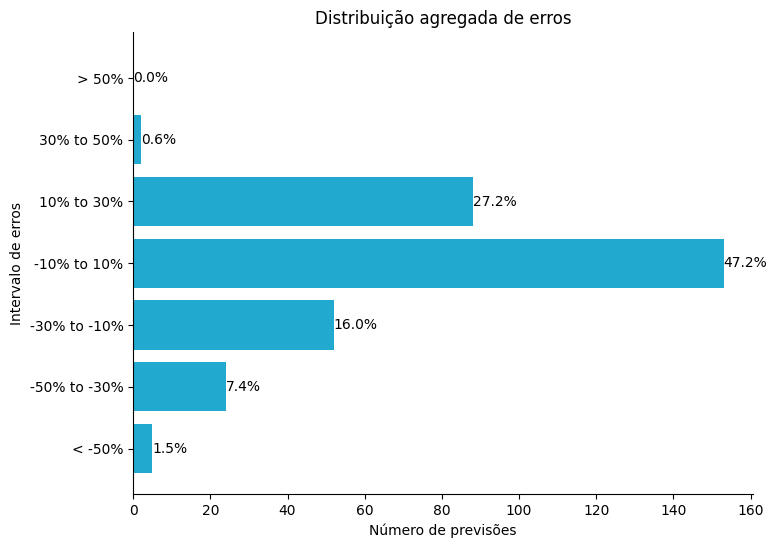

In [6]:
plot_error_distribution(df_registered, df_previsto)

In [7]:
def calculate_errors_summary(df_registered, df_previsto):
    errors = ((df_registered - df_previsto) / df_registered) * 100
    
    rmse_values = []
    mae_values = []
    mape_values = []

    for column in df_registered.columns:
        actual = df_registered[column]
        predicted = df_previsto[column]

        rmse = mean_squared_error(actual, predicted, squared=False)
        mae = mean_absolute_error(actual, predicted)
        mape = (100 / len(actual)) * sum(abs((actual - predicted) / actual))

        rmse_values.append(round(rmse,2))
        mae_values.append(round(mae,2))
        mape_values.append(round(mape,2))

    summary = {
        'RMSE': rmse_values,
        'MAE': mae_values,
        'MAPE': mape_values
    }

    summary_df = pd.DataFrame(summary, index=df_registered.columns)
    mean_row = {
        'RMSE': round(sum(rmse_values) / len(rmse_values), 2),
        'MAE': round(sum(mae_values) / len(mae_values), 2),
        'MAPE': round(sum(mape_values) / len(mape_values), 2)
    }
    summary_df.loc['Mean'] = mean_row  

    return summary_df

In [8]:
sumario_erro = calculate_errors_summary(df_registered, df_previsto)
sumario_erro

,RMSE,MAE,MAPE
Registrado (mil ton.),,,
Acre,2.12,1.82,15.78
Alagoas,4.93,3.66,11.43
Amapá,2.30,1.92,22.57
Amazonas,5.76,4.81,11.28
Bahia,42.93,36.85,13.41
Ceara,24.26,18.52,15.03
Distrito Federal,7.86,6.56,12.87
Espirito Santo,9.76,8.00,8.80
Goiais,23.92,18.48,8.73
